In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv

load_dotenv()

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    google_api_key=os.environ.get("GOOGLE_API_KEY"),
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

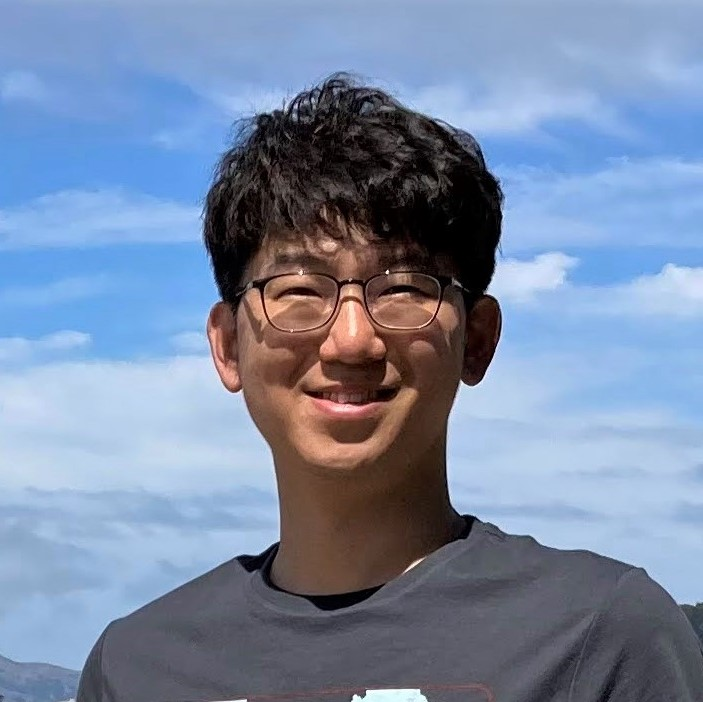

추출된 사용자 정보:
- 체형: 직사각형
- 피부톤: 봄 웜톤


In [21]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    google_api_key=os.environ.get("GOOGLE_API_KEY"),
    temperature=0,
)

import base64
from langchain_core.messages import HumanMessage
from pydantic import BaseModel, Field
from IPython.display import Image, display
 
class UserInfo(BaseModel):
    body_type: str = Field(..., description="사람의 체형")
    skin_tone: str = Field(..., description="사람의 피부톤")

# 스트럭쳐 아웃풋 모델 생성
structured_llm = llm.with_structured_output(UserInfo)

#이미지 경로 지정
image_file_path = "/Users/estsoft/Desktop/fold/deepsearch/ikbum.gif"

with open(image_file_path, "rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")
display(Image(filename=image_file_path, width=300, height=300))

IMAGE_ANALYSIS_PROMPT = """
당신은 전문 이미지 분석가입니다. 제공된 인물 사진을 아래 기준에 따라 분류하세요.

1. **체형 분류 (5가지 중 선택)**:
- 삼각형: 어깨가 골반보다 좁음 (주로 여성)
- 역삼각형: 어깨가 골반보다 넓음 (주로 남성)
- 모래시계형: 어깨와 골반 비슷, 허리 잘록함 (주로 여성)
- 직사각형: 어깨와 골반 비슷, 허리 굴곡 없음 (남녀 모두)
- 둥근형: 상체에 통통함, 허리-배가 돌출 (남녀 모두)

2. **퍼스널 컬러 분류 (4가지 중 선택)**:
- 봄 웜톤 
- 여름 쿨톤
- 가을 웜톤
- 겨울 쿨톤 

3. **출력 형식**:
- 체형: [해당 체형]
- 퍼스널 컬러: [해당 톤과 세부 타입]
- 간단한 이유: [선택한 이유를 1-2문장으로 설명]

이미지를 분석하여 위 기준에 맞게 정확히 분류해 주세요.
"""

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": IMAGE_ANALYSIS_PROMPT,
        },
        {
            "type": "image_url",
            "image_url": f"data:image/jpeg;base64,{encoded_image}"
        },
    ]
)

# 구조화된 LLM을 호출하여 정보를 추출합니다.
result = structured_llm.invoke([message])

# 추출된 결과를 출력합니다.
print("추출된 사용자 정보:")
print(f"- 체형: {result.body_type}")
print(f"- 피부톤: {result.skin_tone}")

